# Gradient variations

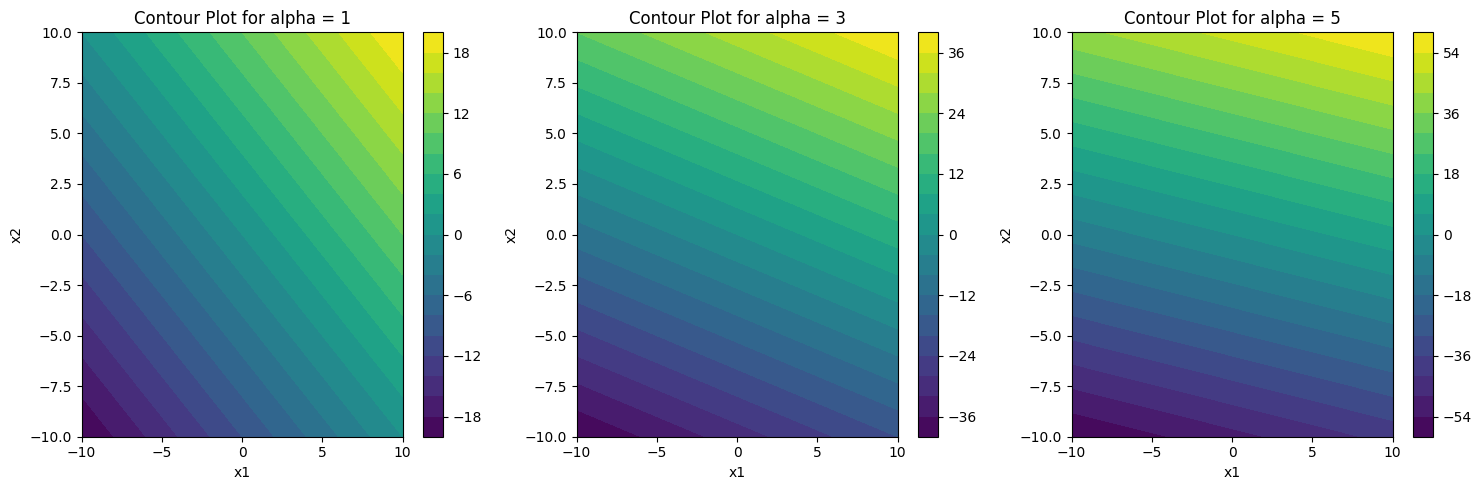

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradients
def f(x1, x2, alpha):
    return x1 + alpha * x2

def gradient(x1, x2, alpha):
    return np.array([1, alpha])

# Create a meshgrid to visualize the gradient field
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1, x2)

# Values of alpha to consider
alphas = [1, 3, 5]

fig, axs = plt.subplots(1, len(alphas), figsize=(15,5))

for i, alpha in enumerate(alphas):
    # Evaluate the function over the grid
    Z = f(X1, X2, alpha)

    # Plot the contours
    contour = axs[i].contourf(X1, X2, Z, 20, cmap='viridis')  # '20' specifies the number of contour levels
    fig.colorbar(contour, ax=axs[i])  # Add colorbar for reference
    axs[i].set_title(f"Contour Plot for alpha = {alpha}")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")

plt.tight_layout()
plt.show()


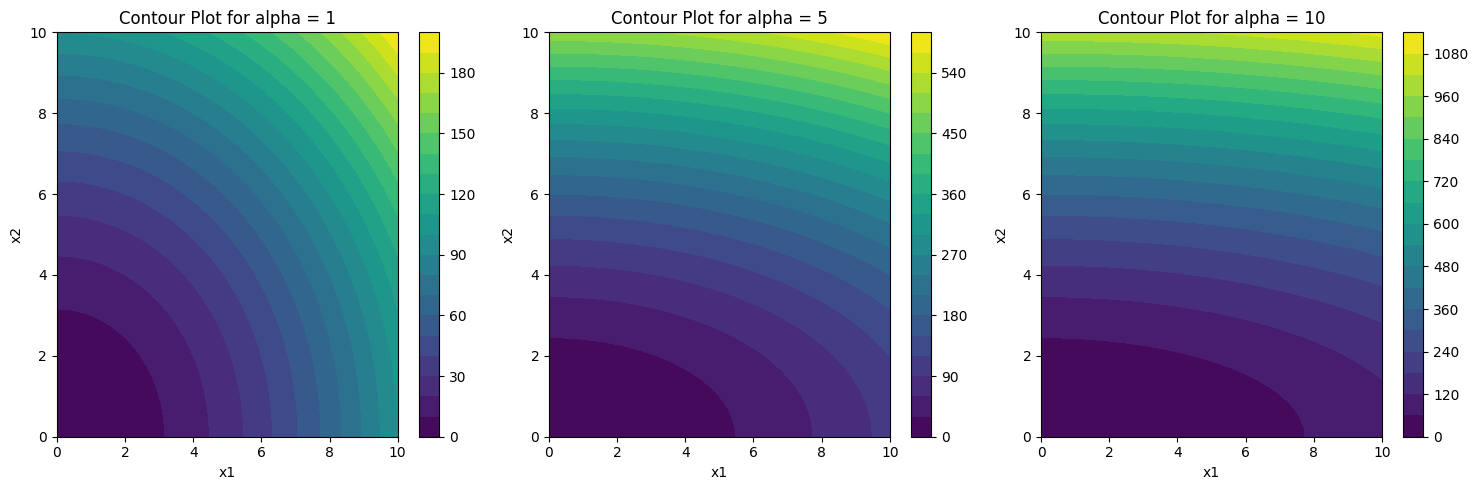

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradients
def f(x1, x2, alpha):
    return x1**2 + alpha * x2**2

def gradient(x1, x2, alpha):
    return np.array([2*x1, alpha*2*x2])

# Create a meshgrid to visualize the gradient field
x1 = np.linspace(0, 10, 50)
x2 = np.linspace(0, 10, 50)
X1, X2 = np.meshgrid(x1, x2)

# Values of alpha to consider
alphas = [1, 5, 10]

fig, axs = plt.subplots(1, len(alphas), figsize=(15,5))

for i, alpha in enumerate(alphas):
    # Evaluate the function over the grid
    Z = f(X1, X2, alpha)

    # Plot the contours
    contour = axs[i].contourf(X1, X2, Z, 20, cmap='viridis')  # '20' specifies the number of contour levels
    fig.colorbar(contour, ax=axs[i])  # Add colorbar for reference
    axs[i].set_title(f"Contour Plot for alpha = {alpha}")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")

plt.tight_layout()
plt.show()
